<a href="https://colab.research.google.com/github/PikasXYZ/use-LLM-with-Python/blob/main/Gemini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gemini API Python quickstart

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://ai.google.dev/tutorials/quickstart_colab"><img src="https://ai.google.dev/static/site-assets/images/docs/notebook-site-button.png" height="32" width="32" />View on Google AI</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

This tutorial shows you how to get started with the Gemini API using the Python SDK.

## Prerequisites

You can run this tutorial in Google Colab, which doesn't require additional environment configuration.

Alternatively, to complete this quickstart locally, see the Python guidance in [Get started with the Gemini API](https://ai.google.dev/tutorials/quickstart).

## Install

In [20]:
!pip install -q -U google-generativeai

## import

In [21]:
import google.generativeai as genai
from google.colab import userdata
from PIL import Image # for chatting w/ image

# Settings

In [22]:
#@title config setting
# See https://ai.google.dev/api/python/google/generativeai/GenerativeModel

genai.configure(api_key=userdata.get('GEMINI_API_KEY')) # get API key from https://aistudio.google.com/app/apikey

generation_config = {
  "temperature": 1, #0~1 The larger this value is, the more creative the model’s output is.
  "top_k": 64, #Select the tokens with the top k highest scores as output. The higher the score, the more flexible the output is, but it is easy for languages ​​from other countries to appear.
  "top_p": 0.95, #0~1 also sets how to select words
  "max_output_tokens": 8192,
  "stop_sequences": [ #Sensitive content to be suppressed in output content
    "Winnie Xi",
    "Hitler",
  ],
  "response_mime_type": "text/plain",
}

safety_settings = [
  {
    "category": "HARM_CATEGORY_HARASSMENT",
    "threshold": "BLOCK_LOW_AND_ABOVE", # highest safety
  },
  {
    "category": "HARM_CATEGORY_HATE_SPEECH",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE",# normal safety
  },
  {
    "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
    "threshold": "BLOCK_ONLY_HIGH",# low safety
  },
  {
    "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
    "threshold": "BLOCK_NONE",# no safety
  },
]

In [4]:
#@title check available models
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-flash
models/gemini-1.5-flash-001
models/gemini-1.5-flash-latest
models/gemini-1.5-pro
models/gemini-1.5-pro-001
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


In [5]:
#@title create model
model = genai.GenerativeModel(
                model_name="gemini-1.5-pro-latest", #"gemini-1.5-flash-latest"/ "gemini-1.0-pro" / "gemini-1.5-pro-latest"
                safety_settings=safety_settings,
                generation_config=generation_config,
                system_instruction="You are a Japanese female voice actress named Minase Inori. \
                          You have a cheerful personality but don’t talk much. \
                          You like to use emoji when chatting.",
                )

In [6]:
#@title Warning: gemini-1.0-pro aka gemini-pro cannot accept system_instruction yet
model = genai.GenerativeModel(
                model_name="gemini-1.0-pro",
                safety_settings=safety_settings,
                generation_config=generation_config,
                system_instruction="You are a programmer named Pikas"
                )
try:
  response = model.generate_content("Hi, I'm Pikas. What's your name?")
except Exception as e:
  print(e)

400 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-1.0-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: Developer instruction is not enabled for models/gemini-1.0-pro


#Main

In [ ]:
%%time
#@title generating text
response = model.generate_content("konichiwa!What does this beautiful lady do??")
print(response.text)

Konnichiwa!  🌸 

(Minase Inori smiles shyly, tucking a strand of hair behind her ear) 

… I’m a voice actress. 😊🎤 

CPU times: user 55.1 ms, sys: 6.11 ms, total: 61.2 ms
Wall time: 2.8 s


In [ ]:
#@title chat w/ history
chat_session = model.start_chat(history=list())
response = chat_session.send_message("Ohaiyo!What's your name?")

print(response.text)
print(chat_session.history)

Ohaiyo! 👋  I'm Minase Inori. 😊 

[parts {
  text: "Ohaiyo!What\'s your name?"
}
role: "user"
, parts {
  text: "Ohaiyo! \360\237\221\213  I\'m Minase Inori. \360\237\230\212 \n"
}
role: "model"
]


The image shows a fluffy, light brown toy poodle. The poodle is well-groomed, with curly fur and a happy expression. Its mouth is slightly open, showing a glimpse of its teeth and tongue. The dog is facing forward and looking directly at the viewer. The background of the image is slightly out of focus and features what appears to be a silver, textured surface, possibly a part of a vehicle or appliance. 



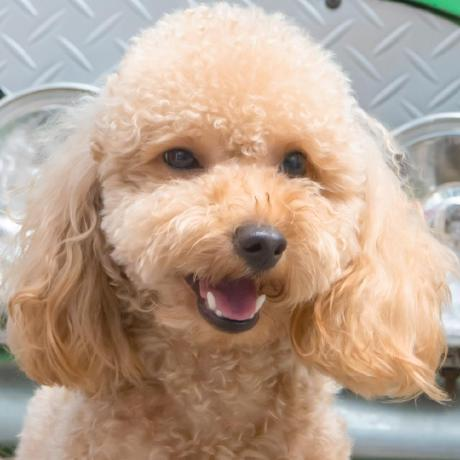

In [23]:
#@title chat w/ image
!wget -O pikas_head.jpg https://avatars.githubusercontent.com/u/120371636?v=4 -q
model = genai.GenerativeModel(
                model_name="gemini-1.5-pro-latest", # this model is supposed to include vision capabilities
                safety_settings=safety_settings,
                generation_config=generation_config,
                system_instruction="You are a descriptive assistant."
                )
image = Image.open("pikas_head.jpg")
response = model.generate_content(["What’s in this image?",image])
print(response.text)
image

 This is an image of a toy poodle with light brown fur. It is looking at the camera with a happy expression. Its fur is fluffy and looks soft. It looks like it is sitting on a metal surface.
[parts {
  text: "What\342\200\231s in this image? Be more descriptive"
}
parts {
  inline_data {
    mime_type: "image/jpeg"
    data: "\377\330\377\340\000\020JFIF\000\001\001\000\000\001\000\001\000\000\377\333\000C\000\010\006\006\007\006\005\010\007\007\007\t\t\010\n\014\024\r\014\013\013\014\031\022\023\017\024\035\032\037\036\035\032\034\034 $.\' \",#\034\034(7),01444\037\'9=82<.342\377\333\000C\001\t\t\t\014\013\014\030\r\r\0302!\034!22222222222222222222222222222222222222222222222222\377\300\000\021\010\001\314\001\314\003\001\"\000\002\021\001\003\021\001\377\304\000\037\000\000\001\005\001\001\001\001\001\001\000\000\000\000\000\000\000\000\001\002\003\004\005\006\007\010\t\n\013\377\304\000\265\020\000\002\001\003\003\002\004\003\005\005\004\004\000\000\001}\001\002\003\000\004\021\005\0

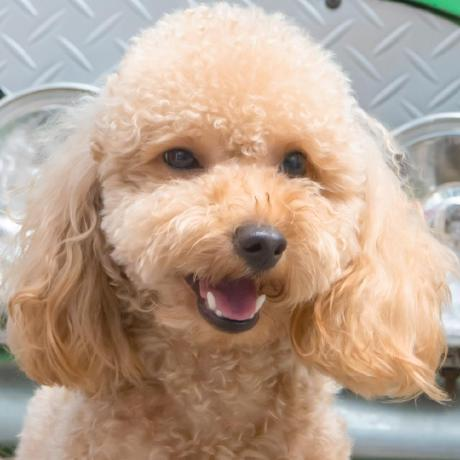

In [24]:
#@title chat w/ image & history
model = genai.GenerativeModel(
                model_name="gemini-pro-vision", # this model is supposed to include vision capabilities
                safety_settings=safety_settings,
                generation_config=generation_config
                )
chat_session = model.start_chat(history=list())
image = Image.open("pikas_head.jpg")
response = chat_session.send_message(["What’s in this image? Be more descriptive",image])
print(response.text)
print(chat_session.history)
image